In [19]:
# data manipulation
import pandas as pd
import numpy as np

# visualiation
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
dfa = pd.read_csv("D:\college stuff\SEM IV\MLA\MLA PRACTICLE SEMIV\PRACTICLE 4/Mall_Customers.csv")

In [21]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
dfa.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
dfa.drop('CustomerID',axis=1,inplace=True)

In [24]:
dfa.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\Aditya\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aditya\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aditya\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

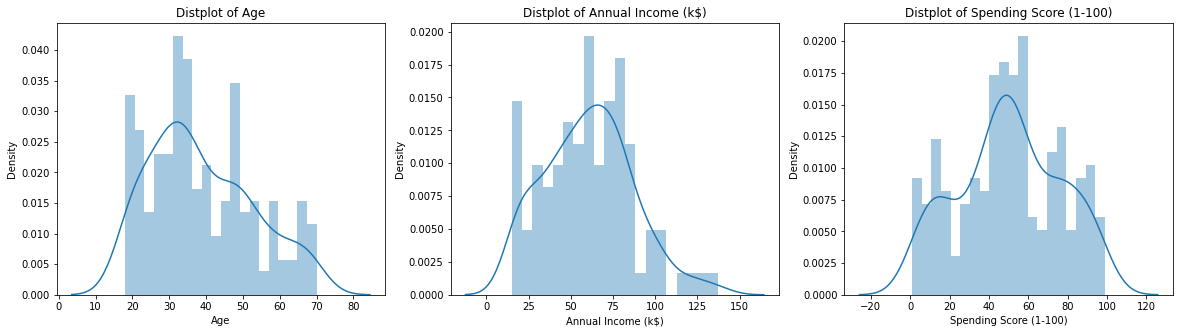

In [25]:
plt.figure(1,figsize=(20,5))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.distplot(dfa[x],bins=20)
    plt.title('Distplot of '+x)
plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

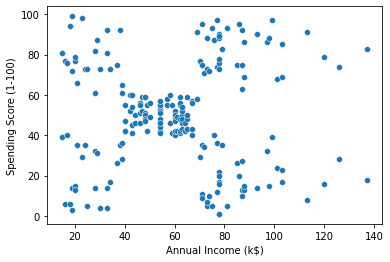

In [26]:
sns.scatterplot(x=dfa['Annual Income (k$)'],y=dfa['Spending Score (1-100)'])

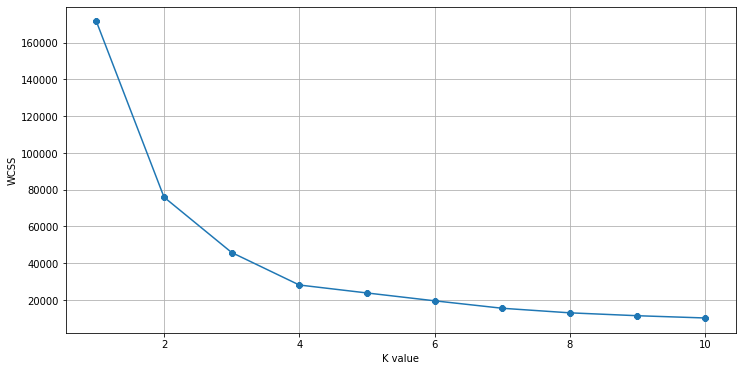

In [27]:
# Determining the value of K Using the elbow method
X1=dfa.loc[:,['Age','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,marker='8')
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [28]:
# Implementing KMeans Clusting
kmeans=KMeans(n_clusters=4) # k= 5 
label=kmeans.fit_predict(X1)
print(label)

[1 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 1 1 0 2 1 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0
 2 0 2 3 2 3 1 0 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 2 1 2 3 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 3 2
 0 2 0 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [29]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


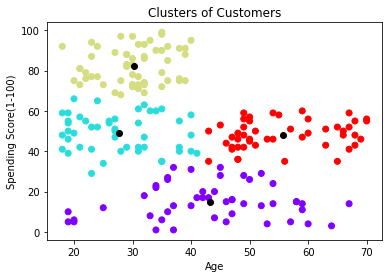

In [30]:
# Visualizing the clusters
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()